<a href="https://colab.research.google.com/github/GioLomia/Stock_Predictor/blob/master/Regression_Intro_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                     **   Simple Linear Regression Classifier for stock prices**
Linear regression demonstration on the Google stock. Not the most accurate model. Simply a demonstration.

In [0]:
!pip install quandl

In [0]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
import sklearn
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
style.use('ggplot')

In [0]:
#Get the data from Quandl
df=quandl.get('WIKI/GOOGL')

In [0]:
#Feature Engeneering
new_df=df[["Adj. Open",	"Adj. High","Adj. Low",	"Adj. Close","Adj. Volume" ]]
new_df["High-Low"] = new_df["Adj. High"] - new_df["Adj. Low"]
new_df["High/Low"]= new_df["Adj. Low"]/new_df["Adj. High"]
new_df["H_L_PCT"]= (new_df["Adj. High"]-new_df["Adj. Close"])/new_df["Adj. Close"]*100
new_df["O_C_PCT"]= (new_df["Adj. Close"]-new_df["Adj. Open"])/new_df["Adj. Open"]*100
new_df=new_df[["Adj. Close","High-Low","High/Low","H_L_PCT","O_C_PCT"]]

In [0]:

forecast_col = "Adj. Close"
new_df.dropna(inplace=True)
forecast_out=int(math.ceil(0.05*len(df)))

In [6]:
#Shifting to predict the future prices
new_df["label"]=new_df[forecast_col].shift(-forecast_out)
print(new_df.tail())

            Adj. Close  High-Low  High/Low   H_L_PCT   O_C_PCT  label
Date                                                                 
2018-03-21     1094.00     21.49  0.980617  1.343693  0.130884    NaN
2018-03-22     1053.15     34.28  0.968374  2.921711 -2.487014    NaN
2018-03-23     1026.55     41.91  0.960714  3.918952 -2.360729    NaN
2018-03-26     1054.09     48.69  0.954034  0.491419  0.332191    NaN
2018-03-27     1006.94     66.92  0.937137  5.720301 -5.353887    NaN


In [7]:
#Preprossesing
X=np.array(new_df.drop(["label"],1))
X_lately=X[-forecast_out:]
X=X[:-forecast_out]
new_df.dropna(inplace=True)

y=np.array(new_df["label"])
print(len(X),len(y))

3252 3252


In [0]:
#Train Test Split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

In [10]:
#Model Set up and training
clf=LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)

accuracy = clf.score(X_test,y_test) 
print(accuracy)  
fore_set=clf.predict(X_lately)


0.9327890528777012


In [0]:
#Save the model
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
pickle_in=open('linearregression.pickle','rb')

clf=pickle.load(pickle_in)

In [0]:
#Plotting Set up
new_df["Forecast"]=np.nan
last_date=new_df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86500
next_unix=last_unix + one_day

<function matplotlib.pyplot.show>

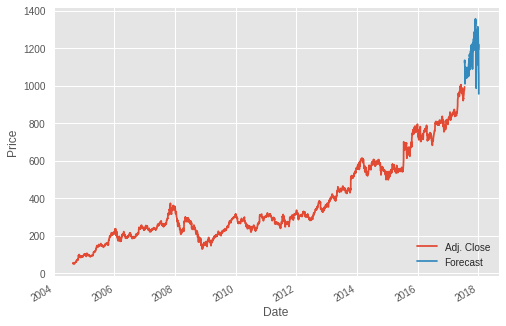

In [13]:
#Plotting the results
for i in fore_set:
    next_date= datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    new_df.loc[next_date]=[np.nan for j in range(len(new_df.columns)-1)] + [i]
    
new_df["Adj. Close"].plot()
new_df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show